In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Rescaling
from tensorflow.keras.models import load_model

from sklearn.metrics import recall_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.model_selection import KFold
import numpy as np


pd.set_option("display.max_columns", 50)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.max_rows", None)

In [44]:
def merge_csv_files_with_filename(directory):
    df_list = []

    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            file_path = os.path.join(directory, filename)

            df = pd.read_csv(file_path)

            df["label"] = str(os.path.splitext(filename)[0]).capitalize()

            df_list.append(df)

    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df


directory = "./datasets/Extraction-Feature-Default-126"
df = merge_csv_files_with_filename(directory)

df.to_csv("datasets/extraction-feature-default/fix-data.csv", index=False)

In [45]:
df.head()

,filename,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,...,x_34,y_34,z_34,x_35,y_35,z_35,x_36,y_36,z_36,x_37,y_37,z_37,x_38,y_38,z_38,x_39,y_39,z_39,x_40,y_40,z_40,x_41,y_41,z_41,label
0,30_02.mp4.jpg,0.373255,0.616804,-1.816693e-08,0.351409,0.619098,-0.004512,0.326864,0.612674,-0.010105,0.307963,0.623768,-0.017276,0.293887,0.636452,-0.024939,0.328161,0.541633,-0.004305,0.311378,0.508804,-0.012500,0.301490,0.486551,-0.018232,...,0.226197,0.536456,-0.019616,0.244488,0.571373,-0.030605,0.236548,0.593559,-0.026407,0.229572,0.588272,-0.022036,0.215205,0.545678,-0.024983,0.231374,0.572056,-0.031254,0.227261,0.589508,-0.026511,0.220126,0.586091,-0.021996,A
1,31_02.mp4.jpg,0.371592,0.618147,-7.931677e-09,0.351278,0.621315,-0.004522,0.326998,0.615042,-0.009841,0.308676,0.624672,-0.016663,0.294507,0.636551,-0.023989,0.327513,0.543382,-0.004697,0.310796,0.509730,-0.012680,0.300777,0.486683,-0.018029,...,0.224994,0.536504,-0.019329,0.243525,0.571629,-0.030349,0.235284,0.593676,-0.026147,0.228277,0.588127,-0.021708,0.214365,0.546184,-0.024795,0.230508,0.573138,-0.030973,0.226150,0.590090,-0.026277,0.218889,0.586028,-0.021817,A
2,32_02.mp4.jpg,0.372520,0.619292,-1.720842e-08,0.351281,0.622631,-0.004291,0.326855,0.616231,-0.009575,0.308177,0.625465,-0.016389,0.293758,0.636890,-0.023712,0.327645,0.544689,-0.004402,0.310426,0.511775,-0.012394,0.300228,0.489204,-0.017814,...,0.224612,0.536610,-0.018759,0.242749,0.571971,-0.029920,0.234871,0.593986,-0.026023,0.227688,0.588286,-0.021782,0.213555,0.546448,-0.024298,0.229637,0.573484,-0.030794,0.225460,0.590206,-0.026412,0.218114,0.585791,-0.022127,A
3,33_02.mp4.jpg,0.371660,0.621027,-1.646164e-08,0.351647,0.624135,-0.004406,0.327593,0.617648,-0.009803,0.309135,0.626462,-0.016717,0.294679,0.637640,-0.024188,0.327657,0.545324,-0.004660,0.310341,0.512614,-0.012782,0.299852,0.489837,-0.018068,...,0.223639,0.536990,-0.020159,0.242321,0.572323,-0.031103,0.234425,0.594694,-0.026944,0.227255,0.589543,-0.022576,0.212932,0.546529,-0.025546,0.229092,0.573986,-0.031669,0.225203,0.591217,-0.027071,0.218088,0.587611,-0.022702,A
4,34_02.mp4.jpg,0.371220,0.620898,-9.597101e-09,0.351270,0.624501,-0.004928,0.327509,0.618427,-0.010831,0.308873,0.627892,-0.018167,0.294208,0.638867,-0.026062,0.327365,0.546828,-0.005543,0.309563,0.514561,-0.014185,0.298696,0.491576,-0.019907,...,0.222885,0.537517,-0.020766,0.242210,0.574147,-0.031702,0.233755,0.595591,-0.027595,0.226580,0.590019,-0.023370,0.212578,0.548088,-0.026394,0.229202,0.576546,-0.032547,0.225010,0.593539,-0.027898,0.217703,0.590220,-0.023582,A


In [46]:
df["label"].value_counts()

label
Maaf            649
Dia             580
Halo            513
Tolong          503
N               494
F               487
Aku             480
S               479
Terima kasih    472
Kemana          471
Sabar           469
A               460
Dimana          459
X               453
Baik            446
Kerja           442
Kalian          437
K               426
Apa             413
P               404
Bapak           403
Lelah           388
Besok           380
Pagi            376
Kemarin         372
Kantor          370
Bagaimana       369
Jawab           364
Tidur           363
Malam           354
Siapa           352
Siang           348
Nanti           347
Ibu             339
U               333
G               331
Kamu            329
Y               329
Hari ini        326
Berapa          325
Lusa            318
E               318
I               314
W               314
Sore            309
Sekarang        307
Kapan           306
L               304
V               299
J             

In [47]:
X = df.drop(columns=["filename", "label"])
y = df["label"]

display(X.head(), y.head())

,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,x_6,y_6,z_6,x_7,y_7,z_7,x_8,...,z_33,x_34,y_34,z_34,x_35,y_35,z_35,x_36,y_36,z_36,x_37,y_37,z_37,x_38,y_38,z_38,x_39,y_39,z_39,x_40,y_40,z_40,x_41,y_41,z_41
0,0.373255,0.616804,-1.816693e-08,0.351409,0.619098,-0.004512,0.326864,0.612674,-0.010105,0.307963,0.623768,-0.017276,0.293887,0.636452,-0.024939,0.328161,0.541633,-0.004305,0.311378,0.508804,-0.012500,0.301490,0.486551,-0.018232,0.294730,...,-0.026444,0.226197,0.536456,-0.019616,0.244488,0.571373,-0.030605,0.236548,0.593559,-0.026407,0.229572,0.588272,-0.022036,0.215205,0.545678,-0.024983,0.231374,0.572056,-0.031254,0.227261,0.589508,-0.026511,0.220126,0.586091,-0.021996
1,0.371592,0.618147,-7.931677e-09,0.351278,0.621315,-0.004522,0.326998,0.615042,-0.009841,0.308676,0.624672,-0.016663,0.294507,0.636551,-0.023989,0.327513,0.543382,-0.004697,0.310796,0.509730,-0.012680,0.300777,0.486683,-0.018029,0.294224,...,-0.025434,0.224994,0.536504,-0.019329,0.243525,0.571629,-0.030349,0.235284,0.593676,-0.026147,0.228277,0.588127,-0.021708,0.214365,0.546184,-0.024795,0.230508,0.573138,-0.030973,0.226150,0.590090,-0.026277,0.218889,0.586028,-0.021817
2,0.372520,0.619292,-1.720842e-08,0.351281,0.622631,-0.004291,0.326855,0.616231,-0.009575,0.308177,0.625465,-0.016389,0.293758,0.636890,-0.023712,0.327645,0.544689,-0.004402,0.310426,0.511775,-0.012394,0.300228,0.489204,-0.017814,0.293349,...,-0.025306,0.224612,0.536610,-0.018759,0.242749,0.571971,-0.029920,0.234871,0.593986,-0.026023,0.227688,0.588286,-0.021782,0.213555,0.546448,-0.024298,0.229637,0.573484,-0.030794,0.225460,0.590206,-0.026412,0.218114,0.585791,-0.022127
3,0.371660,0.621027,-1.646164e-08,0.351647,0.624135,-0.004406,0.327593,0.617648,-0.009803,0.309135,0.626462,-0.016717,0.294679,0.637640,-0.024188,0.327657,0.545324,-0.004660,0.310341,0.512614,-0.012782,0.299852,0.489837,-0.018068,0.292905,...,-0.026806,0.223639,0.536990,-0.020159,0.242321,0.572323,-0.031103,0.234425,0.594694,-0.026944,0.227255,0.589543,-0.022576,0.212932,0.546529,-0.025546,0.229092,0.573986,-0.031669,0.225203,0.591217,-0.027071,0.218088,0.587611,-0.022702
4,0.371220,0.620898,-9.597101e-09,0.351270,0.624501,-0.004928,0.327509,0.618427,-0.010831,0.308873,0.627892,-0.018167,0.294208,0.638867,-0.026062,0.327365,0.546828,-0.005543,0.309563,0.514561,-0.014185,0.298696,0.491576,-0.019907,0.291362,...,-0.026781,0.222885,0.537517,-0.020766,0.242210,0.574147,-0.031702,0.233755,0.595591,-0.027595,0.226580,0.590019,-0.023370,0.212578,0.548088,-0.026394,0.229202,0.576546,-0.032547,0.225010,0.593539,-0.027898,0.217703,0.590220,-0.023582


0    A
1    A
2    A
3    A
4    A
Name: label, dtype: object

In [48]:
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_one_hot = to_categorical(y_encoded)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

class_names = label_encoder.classes_
class_names

array(['A', 'Aku', 'Apa', 'B', 'Bagaimana', 'Baik', 'Bapak', 'Berapa',
       'Besok', 'C', 'D', 'Dia', 'Dimana', 'E', 'F', 'G', 'H', 'Halo',
       'Hari ini', 'I', 'Ibu', 'J', 'Jawab', 'K', 'Kalian', 'Kamu',
       'Kantor', 'Kapan', 'Kemana', 'Kemarin', 'Kerja', 'L', 'Lelah',
       'Lusa', 'M', 'Maaf', 'Makan', 'Malam', 'Mengapa', 'N', 'Nanti',
       'O', 'P', 'Pagi', 'Q', 'R', 'S', 'Sabar', 'Sama - sama', 'Sedih',
       'Sekarang', 'Senang', 'Siang', 'Siapa', 'Sore', 'T',
       'Terima kasih', 'Tidur', 'Tolong', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [49]:
# Save Scaler
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [50]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_one_hot, test_size=0.2, random_state=42
)

In [51]:
X_train.shape

(18827, 126)

In [52]:
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
y_test_df["label"] = label_encoder.inverse_transform(y_test.argmax(axis=1))
y_test_df = y_test_df[["label"]]
y_test_df.reset_index(drop=True, inplace=True)

display(X_test_df.head(), y_test_df.head())
X_test_df.to_csv("./datasets/extraction-feature-default/test-feature.csv", index=False)
y_test_df.to_csv("./datasets/extraction-feature-default/test-label.csv", index=False)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
0,0.127304,1.101463,-0.128657,0.089812,0.909577,-0.011421,0.171847,0.757260,0.200105,0.255882,0.584146,0.452857,0.238572,0.421523,0.581842,0.219822,1.087843,-0.267669,0.317228,0.905564,0.082125,0.371268,0.762454,0.278859,0.400791,...,0.180015,0.719942,0.179018,0.171059,0.799119,-0.083662,0.306035,0.848219,-0.276888,0.160740,0.880383,-0.400639,0.007678,0.782835,0.192935,0.282938,0.871572,0.031913,0.318116,0.925693,-0.101088,0.202482,0.959431,-0.198723,0.082082
1,-0.070630,-0.442015,0.115926,-0.101270,-0.551842,0.138455,-0.016142,-0.559931,0.294739,0.087297,-0.561918,0.407925,0.131372,-0.601382,0.464654,0.295869,-0.199240,0.513447,0.470832,-0.111420,0.639134,0.589671,-0.078780,0.639813,0.671417,...,0.604310,0.407983,-0.094499,0.722995,0.591255,-0.114229,0.736933,0.717538,-0.180782,0.593351,0.812610,-0.203974,0.447421,0.392241,-0.062665,0.734066,0.536717,-0.031700,0.705931,0.638046,-0.055019,0.590197,0.721972,-0.061702,0.472096
2,0.621369,1.531509,0.195347,0.474039,1.706842,0.152575,0.338166,1.828626,0.024432,0.213551,1.937958,-0.028742,0.118405,2.045618,-0.117714,0.410291,1.560556,-0.295458,0.307594,1.437054,-0.210779,0.254928,1.244730,-0.192949,0.228641,...,0.085985,-0.076782,0.649961,-0.423389,-0.237294,1.132730,-0.039165,-0.298015,1.124427,0.196593,-0.295447,1.030545,0.335838,-0.179329,0.489929,-0.302875,-0.283083,0.926881,0.042116,-0.304632,0.993978,0.236318,-0.289863,0.975123,0.352460
3,-1.052577,1.133108,-1.949234,-0.831719,1.374570,1.400302,-0.638355,1.464816,1.737224,-0.619207,1.413203,1.915188,-0.702799,1.324959,1.991968,-0.333172,1.470444,1.595729,-0.447662,1.564371,1.869216,-0.633161,1.620204,1.852768,-0.738572,...,1.950126,-0.504142,1.028896,1.772716,-0.636300,1.003388,1.940372,-0.800657,1.002865,1.930589,-0.886794,1.027479,1.777926,-0.684660,0.827514,1.784033,-0.713998,0.769514,1.904261,-0.677268,0.719619,1.998015,-0.617510,0.705479,1.991329
4,-0.232491,0.411922,0.194198,-0.125663,0.411509,-0.026736,-0.042122,0.399983,0.208101,0.002563,0.320931,0.346296,0.002585,0.207689,0.418506,-0.181514,0.197087,0.475894,-0.164172,0.085052,0.576109,-0.142409,0.006609,0.581310,-0.120191,...,0.523686,-0.267306,0.065781,0.696514,-0.409483,-0.139781,0.690220,-0.441218,-0.321908,0.513414,-0.431290,-0.455781,0.327021,-0.312195,0.088580,0.696778,-0.446234,-0.002509,0.617040,-0.485523,-0.115311,0.446095,-0.483245,-0.211334,0.279535


,label
0,M
1,Sabar
2,K
3,Aku
4,Nanti


In [53]:
y_test_df[y_test_df["label"] == "Q"].head()

,label
186,Q
245,Q
424,Q
487,Q
824,Q


In [54]:
total_class = y_train.shape[1]
total_class

65

Epoch 1/10
589/589 [==============================] - 2s 2ms/step - loss: 1.8952 - accuracy: 0.5665 - val_loss: 0.7217 - val_accuracy: 0.8256
Epoch 2/10
589/589 [==============================] - 1s 2ms/step - loss: 0.5478 - accuracy: 0.8556 - val_loss: 0.3902 - val_accuracy: 0.9040
Epoch 3/10
589/589 [==============================] - 1s 2ms/step - loss: 0.3578 - accuracy: 0.9031 - val_loss: 0.2929 - val_accuracy: 0.9276
Epoch 4/10
589/589 [==============================] - 1s 2ms/step - loss: 0.2956 - accuracy: 0.9172 - val_loss: 0.2619 - val_accuracy: 0.9371
Epoch 5/10
589/589 [==============================] - 1s 2ms/step - loss: 0.2429 - accuracy: 0.9312 - val_loss: 0.2202 - val_accuracy: 0.9482
Epoch 6/10
589/589 [==============================] - 1s 2ms/step - loss: 0.2136 - accuracy: 0.9397 - val_loss: 0.2095 - val_accuracy: 0.9522
Epoch 7/10
589/589 [==============================] - 1s 2ms/step - loss: 0.1988 - accuracy: 0.9424 - val_loss: 0.1908 - val_accuracy: 0.9543
Epoch 

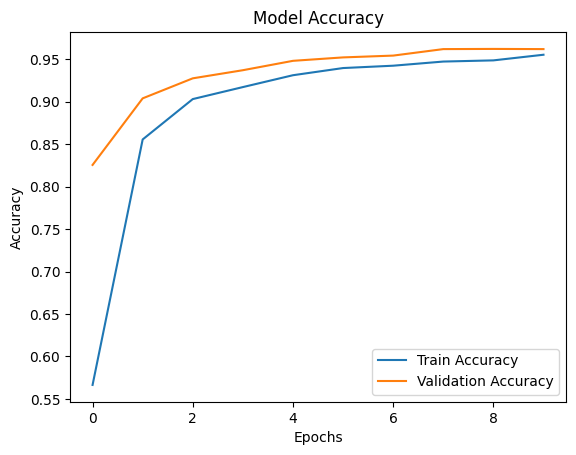

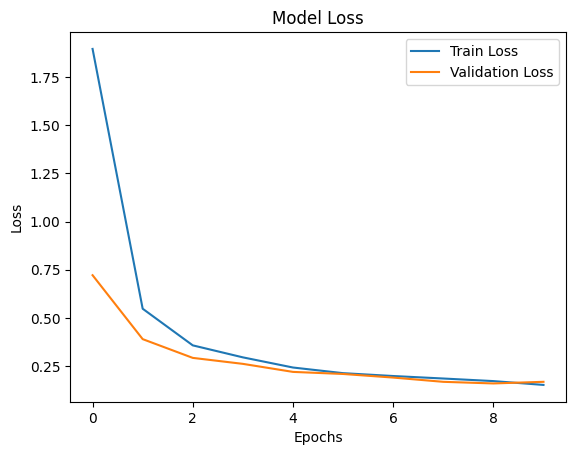

In [55]:
# Define the model
model = Sequential(
    [
        Input(shape=X_train.shape[1:]),
        # Rescaling(1.0 / X_train.max().max(), input_shape=X_train.shape[1:]),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dense(32, activation="relu"),
        Dense(total_class, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(
    # X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test)
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
)

# Visualisasi akurasi
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Visualisasi kerugian
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [56]:
import datetime

model_name = f"model-{datetime.datetime.now().strftime('%Y-%m-%d')}"
model_path = f"{model_name}.h5"
model.save(model_path)
print(model.summary())

# Memuat kembali model tanpa custom_objects
model_load = tf.keras.models.load_model(model_path)
# model_load = tf.keras.models.load_model(model_path, custom_objects={'CustomStandardScaler': CustomStandardScaler})
# # model_load = tf.keras.models.load_model(model_path, custom_objects={'CustomNormalization': CustomNormalization})
# print(model_load.summary())

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open(f"{model_name}.tflite", "wb") as f:
    f.write(tflite_model)

# Load the TFLite model and check for errors
interpreter = tf.lite.Interpreter(model_path=f"{model_name}.tflite")
interpreter.allocate_tensors()

print("Model loaded successfully with no errors.")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense_6 (Dense)             (None, 128)               16256     
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 65)                2145      
                                                                 
Total params: 23041 (90.00 KB)
Trainable params: 22785 (89.00 KB)
Non-trainable params: 256 (1.00 KB)
_________________________________________________________________


c:\Users\ahmad\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


None
INFO:tensorflow:Assets written to: C:\Users\ahmad\AppData\Local\Temp\tmp73u6_pr5\assets


INFO:tensorflow:Assets written to: C:\Users\ahmad\AppData\Local\Temp\tmp73u6_pr5\assets


Model loaded successfully with no errors.


In [64]:
interpreter = tf.lite.Interpreter(model_path='./model-2024-06-21.tflite')
interpreter.allocate_tensors()

# Contoh cara mengatur input dan output tensors (sesuaikan dengan model Anda)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [65]:

# Misalkan X_test adalah sebuah dataframe atau array dengan banyak baris
y_pred_label = []

for i in range(len(X_test)):
    # Ambil satu sampel dari X_test
    input_data = np.array(X_test[i])
    input_data = np.expand_dims(input_data, axis=0)  # Tambahkan dimensi batch (1, ...) jika diperlukan

    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data.astype(np.float32))

    # Melakukan inferensi
    interpreter.invoke()

    # Mendapatkan output dari tensor output
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Mengambil label prediksi (misalnya dengan inverse transform jika diperlukan)
    sub_y_pred_label = label_encoder.inverse_transform(output_data.argmax(axis=1))

    y_pred_label.append(sub_y_pred_label[0])  # Simpan label prediksi

In [66]:
# y_pred = model.predict(X_test)
# y_pred = model_load.predict(X_test)
# y_pred_label = label_encoder.inverse_transform(y_pred.argmax(axis=1))
# print(y_pred_label)
print(y_pred_label[:5])

y_true_label = label_encoder.inverse_transform(y_test.argmax(axis=1))
print(y_true_label[:5])

['N', 'Sabar', 'K', 'Aku', 'Nanti']
['M' 'Sabar' 'K' 'Aku' 'Nanti']


In [67]:
test_feat_df = pd.read_csv("./datasets/extraction-feature-default/test-feature.csv")
test_label_df = pd.read_csv("./datasets/extraction-feature-default/test-label.csv")

display(test_feat_df.head(), test_label_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125
0,0.127304,1.101463,-0.128657,0.089812,0.909577,-0.011421,0.171847,0.757260,0.200105,0.255882,0.584146,0.452857,0.238572,0.421523,0.581842,0.219822,1.087843,-0.267669,0.317228,0.905564,0.082125,0.371268,0.762454,0.278859,0.400791,...,0.180015,0.719942,0.179018,0.171059,0.799119,-0.083662,0.306035,0.848219,-0.276888,0.160740,0.880383,-0.400639,0.007678,0.782835,0.192935,0.282938,0.871572,0.031913,0.318116,0.925693,-0.101088,0.202482,0.959431,-0.198723,0.082082
1,-0.070630,-0.442015,0.115926,-0.101270,-0.551842,0.138455,-0.016142,-0.559931,0.294739,0.087297,-0.561918,0.407925,0.131372,-0.601382,0.464654,0.295869,-0.199240,0.513447,0.470832,-0.111420,0.639134,0.589671,-0.078780,0.639813,0.671417,...,0.604310,0.407983,-0.094499,0.722995,0.591255,-0.114229,0.736933,0.717538,-0.180782,0.593351,0.812610,-0.203974,0.447421,0.392241,-0.062665,0.734066,0.536717,-0.031700,0.705931,0.638046,-0.055019,0.590197,0.721972,-0.061702,0.472096
2,0.621369,1.531509,0.195347,0.474039,1.706842,0.152575,0.338166,1.828626,0.024432,0.213551,1.937958,-0.028742,0.118405,2.045618,-0.117714,0.410291,1.560556,-0.295458,0.307594,1.437054,-0.210779,0.254928,1.244730,-0.192949,0.228641,...,0.085985,-0.076782,0.649961,-0.423389,-0.237294,1.132730,-0.039165,-0.298015,1.124427,0.196593,-0.295447,1.030545,0.335838,-0.179329,0.489929,-0.302875,-0.283083,0.926881,0.042116,-0.304632,0.993978,0.236318,-0.289863,0.975123,0.352460
3,-1.052577,1.133108,-1.949234,-0.831719,1.374570,1.400302,-0.638355,1.464816,1.737224,-0.619207,1.413203,1.915188,-0.702799,1.324959,1.991968,-0.333172,1.470444,1.595729,-0.447662,1.564371,1.869216,-0.633161,1.620204,1.852768,-0.738572,...,1.950126,-0.504142,1.028896,1.772716,-0.636300,1.003388,1.940372,-0.800657,1.002865,1.930589,-0.886794,1.027479,1.777926,-0.684660,0.827514,1.784033,-0.713998,0.769514,1.904261,-0.677268,0.719619,1.998015,-0.617510,0.705479,1.991329
4,-0.232491,0.411922,0.194198,-0.125663,0.411509,-0.026736,-0.042122,0.399983,0.208101,0.002563,0.320931,0.346296,0.002585,0.207689,0.418506,-0.181514,0.197087,0.475894,-0.164172,0.085052,0.576109,-0.142409,0.006609,0.581310,-0.120191,...,0.523686,-0.267306,0.065781,0.696514,-0.409483,-0.139781,0.690220,-0.441218,-0.321908,0.513414,-0.431290,-0.455781,0.327021,-0.312195,0.088580,0.696778,-0.446234,-0.002509,0.617040,-0.485523,-0.115311,0.446095,-0.483245,-0.211334,0.279535


,label
0,M
1,Sabar
2,K
3,Aku
4,Nanti


In [68]:
eval_df = test_label_df
eval_df["label"] = label_encoder.inverse_transform(y_test.argmax(axis=1))
eval_df["predicted_kategorik"] = y_pred_label
print(eval_df.shape)

(4707, 2)


In [69]:
print(eval_df[eval_df["label"] != eval_df["predicted_kategorik"]].shape)
eval_df[eval_df["label"] != eval_df["predicted_kategorik"]].head(20)

(179, 2)


,label,predicted_kategorik
0,M,N
8,Kapan,Kemana
105,Dia,Terima kasih
150,A,X
177,Kamu,Sama - sama
209,Tolong,Sama - sama
252,F,X
377,P,S
427,Sedih,Terima kasih
501,E,C


In [70]:
# Menghitung jumlah True Positives (TP) dan False Negatives (FN) untuk setiap kelas
recall_data = eval_df.groupby("label").apply(
    lambda x: pd.Series(
        {
            "TP": sum(x["label"] == x["predicted_kategorik"]),
            "FN": sum(x["label"] != x["predicted_kategorik"]),
        }
    )
)

# Menghitung recall untuk setiap kelas
recall_data["Recall"] = recall_data["TP"] / (recall_data["TP"] + recall_data["FN"])
recall_data["Recall"] = recall_data["Recall"].fillna(
    0
)  # Mengganti NaN dengan 0 jika ada

recall_data_sorted = recall_data.sort_values(by="Recall")
# Menampilkan hasil
print("Recall for each class:")
print(recall_data_sorted)

Recall for each class:
               TP  FN    Recall
label                          
M              30   6  0.833333
A              79  15  0.840426
P              66  12  0.846154
D              45   8  0.849057
Senang         42   7  0.857143
Kantor         61   7  0.897059
Z              53   5  0.913793
Kalian         77   7  0.916667
Sama - sama    44   4  0.916667
Pagi           68   6  0.918919
Sore           57   5  0.919355
Kamu           69   6  0.920000
B              49   4  0.924528
Ibu            59   4  0.936508
S              77   5  0.939024
Y              62   4  0.939394
Makan          50   3  0.943396
W              50   3  0.943396
Tolong         88   5  0.946237
F              89   5  0.946809
Lelah          74   4  0.948718
Terima kasih   78   4  0.951220
J              60   3  0.952381
Dia           126   6  0.954545
Halo           96   4  0.960000
Jawab          73   3  0.960526
N             100   4  0.961538
Kemana         77   3  0.962500
Aku            82